In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

from graphenv.examples.tsp.graph_utils import make_complete_planar_graph, plot_network

%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
# from graphenv.examples.tsp.tsp_env import TSPEnv

# Create and visualize simple network

In [3]:
N = 20
G = make_complete_planar_graph(N, seed=2)

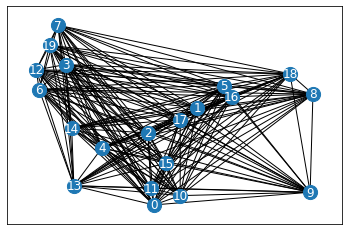

In [4]:
_ = plot_network(G, path=None)

In [5]:
def calc_cost(path):
    return sum((G[start][end]["weight"] for start, end
                in zip(path, path[1:])))

# Solve TSP using nx heuristics

TSP solution 3.215681555027801


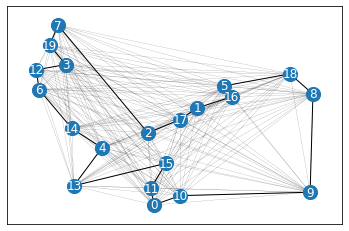

In [6]:
tsp = nx.approximation.traveling_salesman_problem
path_christofides = tsp(G, cycle=True)
print("TSP solution", calc_cost(path_christofides))

_ = plot_network(G, path=path_christofides)

TSP solution 3.5782736971658893


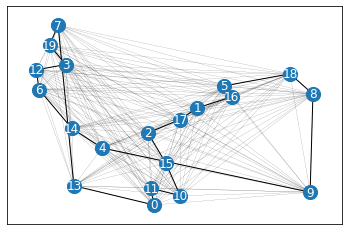

In [7]:
from networkx.algorithms.approximation.traveling_salesman import greedy_tsp

path_greedy = tsp(G, cycle=True, method=greedy_tsp)
print("TSP solution", calc_cost(path_greedy))

_ = plot_network(G, path=path_greedy)

TSP solution 8.97371252178715


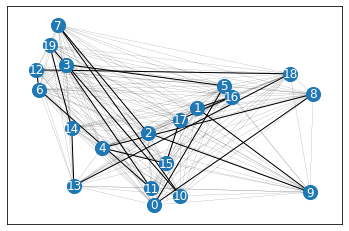

In [8]:
from functools import partial
from graphenv.examples.tsp.graph_utils import random_tsp

path_random = tsp(G, cycle=True, method=partial(random_tsp, seed=1))
print("TSP solution", calc_cost(path_random))

_ = plot_network(G, path=path_random)

In [43]:
node_visited = np.ones(40)
node_visited[path_greedy[:7]] = 2

In [44]:
node_visited

array([2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [84]:
%autoreload 2
from graphenv.examples.tsp.tsp_preprocessor import TSPPreprocessor
from graphenv.examples.tsp.tsp_nfp_state import TSPNFPState
from graphenv.examples.tsp.tsp_nfp_model import TSPGNNModel
from graphenv.graph_env import GraphEnv


preprocessor = TSPPreprocessor(max_num_neighbors=5)
preprocessor(G)


state = TSPNFPState(G, preprocessor(G), path_greedy[:7])
state.observation


env = GraphEnv({'state': state, 'max_num_children': G.number_of_nodes()})
obs = env.make_observation()


model = TSPGNNModel._create_base_model()
model(obs['vertex_observations'])

[<tf.Tensor: shape=(21, 1), dtype=float32, numpy=
 array([[-0.06572198],
        [-0.39099059],
        [-0.30148906],
        [-0.11794405],
        [-0.42239717],
        [-0.50586414],
        [-0.30996472],
        [-0.46330905],
        [-0.452292  ],
        [-0.46106622],
        [-0.3402742 ],
        [-0.10254171],
        [-0.28365046],
        [-0.46958086],
        [-0.06572198],
        [-0.06572198],
        [-0.06572198],
        [-0.06572198],
        [-0.06572198],
        [-0.06572198],
        [-0.06572198]], dtype=float32)>,
 <tf.Tensor: shape=(21, 1), dtype=float32, numpy=
 array([[-0.06566   ],
        [-0.39092827],
        [-0.3014279 ],
        [-0.11788304],
        [-0.42233488],
        [-0.50580114],
        [-0.30990273],
        [-0.46324843],
        [-0.45222977],
        [-0.4610047 ],
        [-0.34021196],
        [-0.1024808 ],
        [-0.28358865],
        [-0.4695184 ],
        [-0.06566   ],
        [-0.06566   ],
        [-0.06566   ],
        